In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Documentation of file formats

In the document below, we include some documentation of the file formats generated by the SQUID practicum software, including some example plotting routines. 

For more information on what is in the files and how it is generated, you can also have a look at the source code:

https://gitlab.tudelft.nl/python-for-applied-physics/rp-squid-python-code/-/blob/master/SQUID%20measurement%20software.md

Below, we document the four types of files generated by the software:

* I-V data file
* R-T data file
* phi-V data file
* PSD file

## I-V data file

Data in file generated from: 

```
np.savetxt(outname, np.array([t,I,V]).T)
```

The columns of the data file are:

* **Column 0:** Sampling time of digitizer in seconds
* **Column 1:** Applied current in $\mu$A
* **Column 2:** Measured voltage in $\mu$V

A recommended plot for documenting your data in a logbook:

Text(0, 0.5, 'Measured voltage $V$ ($\\mu$V)')

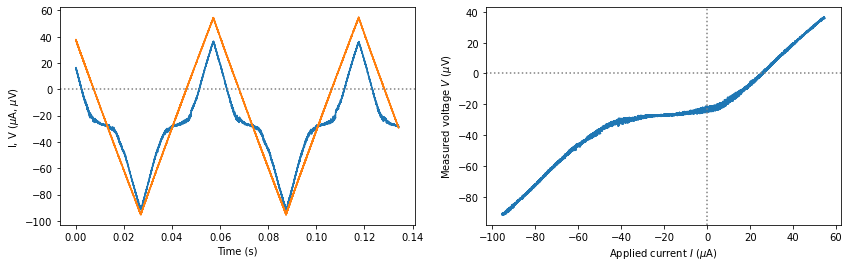

In [2]:
file =  "mrsquid_V-I_2020-10-16-12_05_03.dat"
t,i,v = np.loadtxt(file, unpack=True)

plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t,v)
plt.plot(t,i)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i,v)
plt.axhline(0,ls=':',c='grey')
plt.axvline(0,ls=':',c='grey')
plt.xlabel("Applied current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$V)")

## R-T data file

Data in file generated from:

```
np.savetxt(outname, np.array([R,T,tm,Iavg,Iptp,Vavg,Vptp]).T)
```

* **Column 0:** Measured resistance from IV trace in Ohms (determined from linear fit)
* **Column 1:** Measured temperature in Kelvin
* **Column 2:** Measurement time in seconds since start of trace
* **Column 3:** Averge applied current from IV trace
* **Column 4:** Peak-to-peak applied current from IV trace
* **Column 5:** Averge measured voltage from IV trace
* **Column 6:** Peak-to-peak measured current from IV trace

A recommended plot for documenting your data in a logbook:

Text(0.5, 0, 'Measured Temperature (K)')

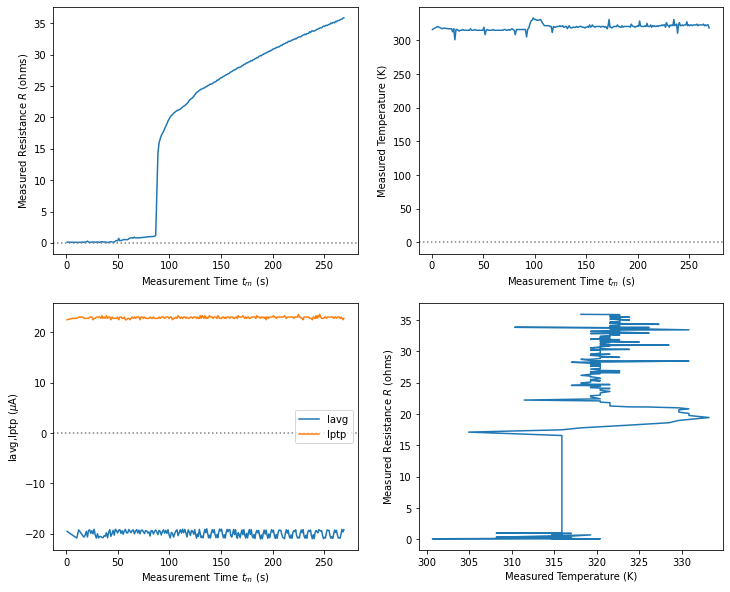

In [3]:
file =  "mrsquid_R_vs_T_2020-10-16-12_12_00.dat"
R,T,tm,Iavg,Iptp,Vavg,Vptp = np.loadtxt(file, unpack=True)
plt.subplots(figsize=(12,10))
plt.subplot(221)
plt.plot(tm,R)
plt.axhline(0,ls=':',c='grey')
plt.xlabel("Measurement Time $t_m$ (s)")
plt.ylabel("Measured Resistance $R$ (ohms)")
plt.subplot(222)
plt.plot(tm,T)
plt.axhline(0,ls=':',c='grey')
plt.xlabel("Measurement Time $t_m$ (s)")
plt.ylabel("Measured Temperature (K)")
plt.subplot(223)
for name in "Iavg","Iptp":
    d = eval(name)
    plt.plot(tm,d,label=name)
plt.axhline(0,ls=':',c='grey')
plt.xlabel("Measurement Time $t_m$ (s)")
plt.ylabel("Iavg,Iptp ($\mu$A)")
plt.legend()
plt.subplot(224)
plt.plot(T,R)
plt.ylabel("Measured Resistance $R$ (ohms)")
plt.xlabel("Measured Temperature (K)")


# $\Phi$-V data file

In $\Phi$-V mode, the magnetic flux in the loop is modulated by passing an current through the flux bias wire ("line").

In practice, therefore, what is recorded is also a trace showing the measured voltage $V$ as a function of an applied current $I$. However, this applied current is passing through the flux bias line wire instead of the junctions themselves. 

The file format is therefore the same, just the meaning of the axis labels are different:

* **Column 0:** Sampling time of digitizer in seconds
* **Column 1:** Flux bias current in $\mu$A
* **Column 2:** Measured voltage in $\mu$V

Text(0, 0.5, 'Measured voltage $V$ ($\\mu$V)')

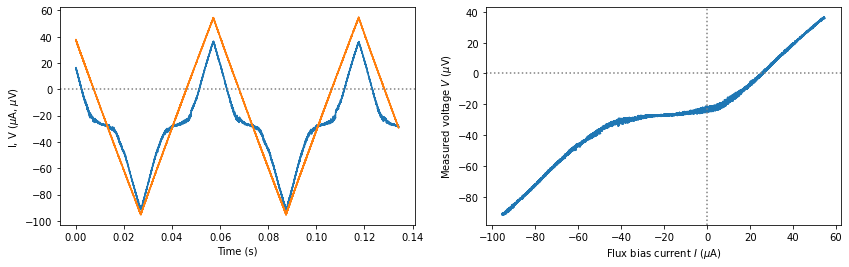

In [5]:
file =  "mrsquid_V-Phi_2020-10-16-12_05_03.dat"
t,i,v = np.loadtxt(file, unpack=True)

plt.subplots(figsize=(14,4))
plt.subplot(121)
plt.plot(t,v)
plt.plot(t,i)
plt.xlabel("Time (s)")
plt.ylabel("I, V ($\mu$A, $\mu$V)")
plt.axhline(0,ls=':',c='grey')
plt.subplot(122)
plt.plot(i,v)
plt.axhline(0,ls=':',c='grey')
plt.axvline(0,ls=':',c='grey')
plt.xlabel("Flux bias current $I$ ($\mu$A)")
plt.ylabel("Measured voltage $V$ ($\mu$V)")

# PSD data file

In spectrum analyzer mode, the software calculates the power spectral density of the the two output channels of the 

In practice, therefore, what is recorded is also a trace showing the measured voltage $V$ as a function of an applied current $I$. However, this applied current is passing through the flux bias line wire instead of the junctions themselves. 

The file format is therefore the same, just the meaning of the axis labels are different:

* **Column 0:** Frequency in Hz
* **Column 1:** Current channel PSD $\mu$A$^2$/Hz
* **Column 2:** Voltage channel PSD $\mu$V$^2$/Hz

The PSD files  also  contain a header that shows the values of the PTP  and average measured current and  voltage from the last trace. In the case that you have enabled averaging of the PSD, then these values are from the last acquired time trace. 

The header in your file will look something like this, indicating values in $\mu$A and $\mu$V:

```
# I_avg -2.090143e+01 I_ptp 1.341432e+00 V_avg -2.729911e+01 V_ptp 1.609718e+00
```

You extract by opening  the file in python and retrieving the first line, and you can parse it using functions like `split()` that  are built into python  strings. 

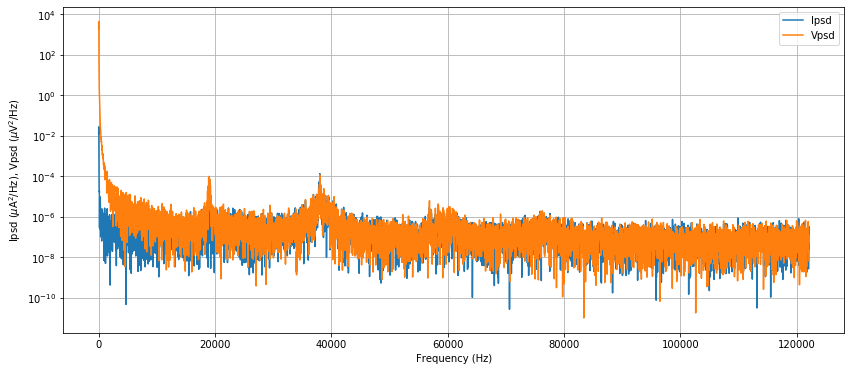

In [9]:
file = "mrsquid_PSD_2020-10-16-11_45_41.dat"
f,Ipsd,Vpsd = np.loadtxt(file, unpack=True)

plt.subplots(figsize=(14,6))
plt.plot(f,Ipsd, label='Ipsd')
plt.plot(f,Vpsd, label='Vpsd')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Ipsd ($\mu$A$^2$/Hz), Vpsd ($\mu$V$^2$/Hz)")
plt.legend()
plt.yscale('log')
plt.grid()